<a href="https://colab.research.google.com/github/CarrenP/datamining/blob/main/Carren_0706022210052_Week_6_Prima_Indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [4]:
prima = pd.read_csv('https://raw.githubusercontent.com/CarrenP/files/refs/heads/main/diabetes.csv')
prima.head()

# importing data set dari github dengan tipe file csv dan juga print 10 kolum teratas dari data yang ada.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
prima.info()

# menunjukan informasi mengenai tabel, dari data type, jumlah data hingga nama kolum.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
prima.describe()

# menampilkan ringkasan statistik dari dataset penguins yang berisi informasi tentang kolom numerik.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


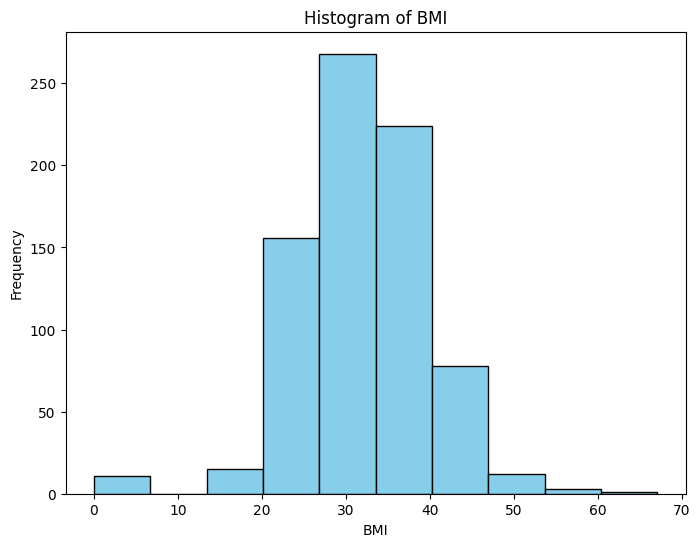

In [7]:


plt.figure(figsize=(8, 6))
plt.hist(prima['BMI'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

# Show plot
plt.show()

# menmpilkan histogram bmi

# chart ini menunjukan bahwa rata-rata peserta dataset ini memniliki rentan BMI 30. dan terendah di rentan 60-70.

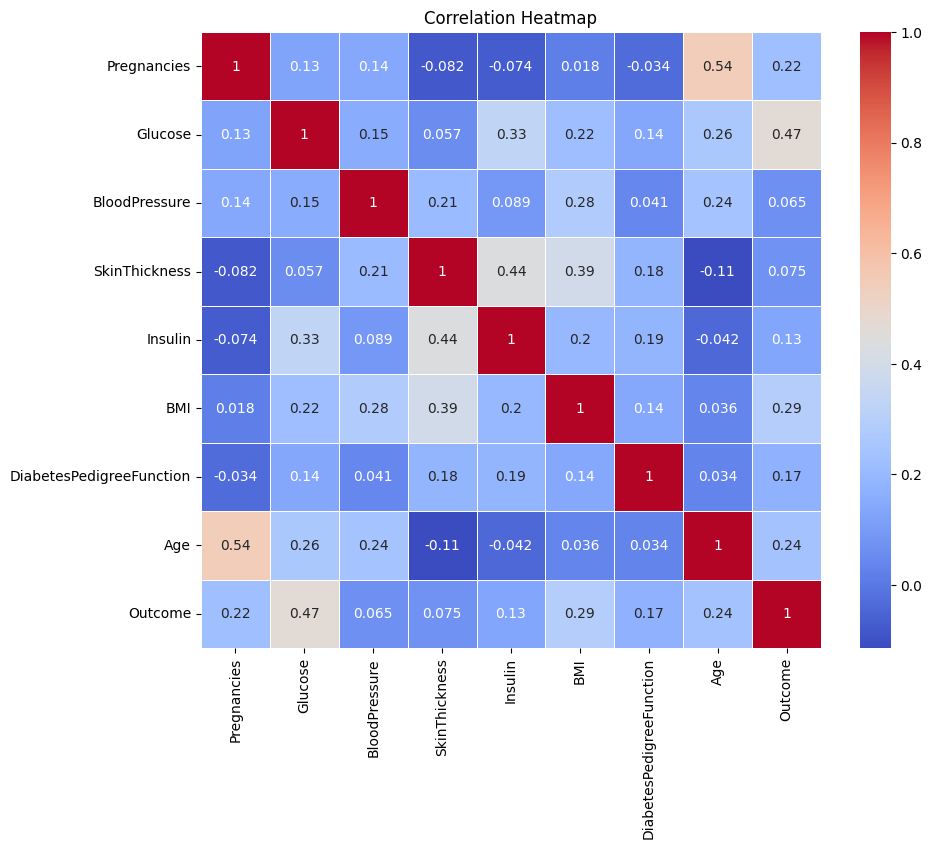

In [8]:


# Calculate the correlation matrix
correlation_matrix = prima.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

plt.show()

# untuk memunculkan visualisasi heatmap

# Glucose dan BMI menunjukkan korelasi positif yang cukup kuat dengan Outcome, menandakan bahwa kadar glukosa dan BMI yang tinggi berhubungan dengan peningkatan risiko diabetes. Selain itu, Age memiliki hubungan erat dengan jumlah kehamilan (pregnancies).
# Faktor lain seperti BloodPressure, SkinThickness, dan DiabetesPedigreeFunction memiliki korelasi yang lebih lemah terhadap diabetes.
# Berdasarkan dataset ini Glucose dan BMI merupakan prediktor utama risiko diabetes.

<ipython-input-10-50b1c42491d1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_glucose_mean = prima.groupby('AgeGroup')['Glucose'].mean()


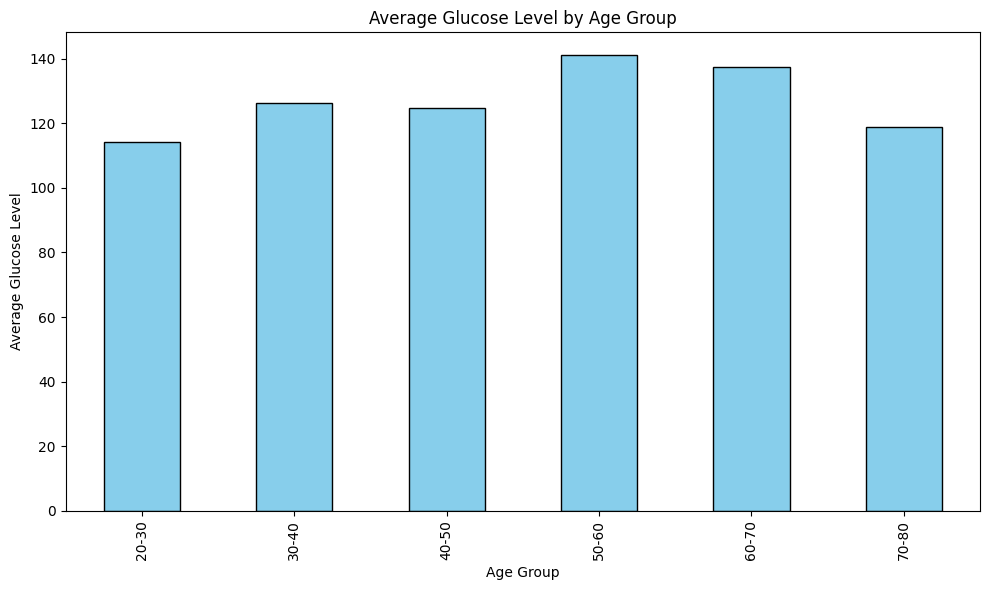

In [10]:
# Membuat kelompok usia dengan pd.cut()
prima['AgeGroup'] = pd.cut(prima['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Menghitung rata-rata Glucose berdasarkan kelompok usia
age_glucose_mean = prima.groupby('AgeGroup')['Glucose'].mean()

# Membuat bar chart
plt.figure(figsize=(10, 6))
age_glucose_mean.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Age Group')
plt.ylabel('Average Glucose Level')
plt.title('Average Glucose Level by Age Group')

# Menampilkan plot
plt.tight_layout()
plt.show()
# menampilkan histogram untuk glucose dan juga age

# Data menunjukkan kadar glukosa meningkat seiring bertambahnya usia, dengan puncak pada kelompok usia 50-60 tahun, lalu menurun pada kelompok usia 60-70 dan 70-80 tahun. Ini mengindikasikan resiko masalah kesehatan terkait glukosa yang lebih tinggi pada usia paruh baya.

In [ ]:
X=prima.drop('Outcome',axis=1)
y=prima['Outcome']

# membuat X berisi semua kolom kecuali kolom outcome, dan y berisi kolom species dari DataFrame

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# membagi dataset, training sebesar 80% dan test sebesar 20%

In [ ]:
X_train.shape,X_test.shape

# menampilkan jumlah baris dan kolum dari variabel X_train dan X-test

In [ ]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_entropy.fit(X_train, y_train)

clf_entropy


# membuat, melatih, dan menampilkan model Decision Tree berbasis entropy

In [ ]:
#b
y_pred = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion entropy index: {accuracy_entropy:.4f}")

# melatih, memprediksi, dan menghitung akurasi model Decision Tree menggunakan kriteria entropy index

In [ ]:
y_train_pred = clf_entropy.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = clf_entropy.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

#  membandingkan akurasi pelatihan dan akurasi pengujian dari model Decision Tree berbasis Gini yang telah dilatih dan jug amelihat apakh modelnya over atau under fititng

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train), filled=True)

# menampilkan decision tree berbasis entropy

In [ ]:
#Criterion Entropy
#a
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)

# Fit the model on your training data (X_train, y_train)
clf_gini.fit(X_train, y_train)

clf_gini


# membuat dan melatih model Decision Tree menggunakan Gini index

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred)
print(f"Model accuracy score with criterion entropy index: {accuracy_gini:.4f}")

# print hasil akurasi

In [ ]:
y_train_pred = clf_gini.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set and calculate accuracy
y_test_pred = clf_gini.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Evaluate if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")

# menampilkan akurasi dari model Decision Tree

In [ ]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled=True)
# menapilkan decision tree berbasis gini

In [ ]:
cmatrix = confusion_matrix(y_test, y_pred) #Untuk membuat confusion matrix
print("Confusion Matrix:\n", cmatrix)

cmatrix = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix:\n", cmatrix)

# Code ini digunakn untuk mencetak confusion matrix.

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report Entropy:\n", report)

report = classification_report(y_test, y_pred_gini)
print("Classification Report Gini:\n", report)

# menghasilkan dan menampilkan laporan klasifikasi untuk model Decision Tree entropy dan Gini index

In [ ]:
# naive bayes

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# menginstal objek Gaussian Naive Bayes dari pustaka scikit-learn.melatih model Naive Bayes yang telah dibuat

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)
# untuk memprediksi label (target) menggunakan model Naive Bayes yang telah dilatih sebelumnya

In [ ]:
cmatrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", cmatrix)

#Untuk membuat dan menampilkan confussion matrix dari naive bayes

#d
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))

# menujukan hasil akurasi

In [ ]:
#e

print(classification_report(y_test, nb_y_pred))
# menampilkan classification report

In [ ]:
# menggunakan logistic regression

#a

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
# melatih model

In [ ]:
#b

y_pred_log = classifier.predict(X_test)

comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})

print(comparison_table.head())

# Membuat prediksi dataframe perbandingan dan juga menampilkan 5 row pertama.

In [ ]:
#c

print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
#menampilkan hasil akurasi dari logistic regression

In [ ]:
# d

cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
# menampilkan confusion matrix

In [ ]:
# e

print (classification_report (y_test, y_pred_log))
# menampilkan classification report